# Ueda's Oscillator
### Dow's final project for PHYS 250, Autumn 2024


This notebook will (at some point) be made interactive. For now, it is a series of code blocks which run computations and generate visualizations for the purposes of my poster.

## Table of Contents
1. Introduction
2. The mathematical model
3. Numerically solving the differential equation
4. Position and phase diagrams. phase portraits could also be cool here, since they demonstrate sensitivity to inital conditions
5. Poincaré sections
6. Bifurcation diagrams
7. Hopf bifurcations
8. Flow map

### Introduction

We study the following differential equation: $$\ddot{x}+\delta\dot{x}+\alpha x^3=\gamma\cos (\omega t)$$  
where $\gamma$ is the amplitude of the driving force and $\omega$ is its angular frequency, $\delta\geq 0$ controls the damping, $\alpha$ controls the nonlinearity of the driving force. As a simplifying assumption, we assume $\omega=\alpha=1$. Not much is lost, as rescaling $x$ and $t$ allows any equation of the above form to be brought into one with $\omega=\alpha=1$. 

We may rewrite the second order differential equation as a pair of first order equations $$\begin{cases}\dot{x_1}=x_2&\\
\dot{x_2}=-\delta x_2- x_1^3+\gamma\cos t\end{cases}$$ which will be useful for our numerical solver below.

**say what this models (kid on swing, bending steel bar, whatever** 

Following Ueda, we set $\delta = 0.05$, and $\gamma = 7.5$. **actually we end up playing with this**

Quote from Ueda (pp.208) "the symmetry of the equation, associated with its invariance under the substitution $-x_1\mapsto x_1, -x_2\mapsto x_2, t+\pi\mapsto t$, implies that a periodic trajectory is either symmetric to itself with respect to the origin of the $xy$ plane or it coexists uith another periodic trajcctory, symmetric to it with respect to the origin." We illustrate each of these phenomena below.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

In [13]:
#this block defines a function which numerically solves the ODE (via 4th order Runge-Kutta) 
# with an arbitrary set of parameters. by default, the parameters are set to Ueda's original (chaotic) parameters
#returns arrays of time values, displacement, velocities, and the last two at intervals of T for the Poincaré section
def solve_ueda(y0, t_start, t_end, max_step=0.1, delta=0.05, gamma=7.5):
    #define the system of ODEs
    def ueda(t, y):
        x1, x2 = y 
        dx1_dt = x2
        dx2_dt = -delta * x2 -  x1**3 + gamma * np.cos(t)
        return [dx1_dt, dx2_dt]

    #introduce RK45 solver
    solver = RK45(ueda, t_start, y0, t_end, max_step=max_step)

    #lists to store results
    t_values, x1_values, x2_values, poincare_x1, poincare_x2 = [], [], [], [], []

    next_poincare_time = 2*np.pi             #initialize time for next Poincaré section as the period of the driving force

    #integrate
    while solver.status == "running":
        solver.step()
        t_values.append(solver.t)
        x1_values.append(solver.y[0])
        x2_values.append(solver.y[1])

        #record Poincaré section data
        if solver.t >= next_poincare_time:
            poincare_x1.append(solver.y[0])
            poincare_x2.append(solver.y[1])
            next_poincare_time += 2*np.pi

    return t_values, x1_values, x2_values, poincare_x1, poincare_x2

In [32]:
#this block defines functions which plot the results of the above simulation
#i.e. position, phase, and poincaré section plots

#when ready to export, enter the argument save_as="your desired title".

def plot_ueda(t_values, x1_values, x2_values, poincare_x1, poincare_x2, title_suffix="", save_as=None):
    # Set up the figure with two side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    #displacement vs. time
    axes[0].plot(t_values, x1_values, label="Displacement (x1)", color="blue")
    axes[0].set_xlim(0, 50)
    axes[0].set_xlabel("Time", fontsize=20)
    axes[0].set_ylabel("Displacement", fontsize=20)
    axes[0].set_title(f"Time Domain {title_suffix}", fontsize=24)
    axes[0].grid()

    #phase plot (last 1000 points)
    axes[1].scatter(poincare_x1[-100:], poincare_x2[-100:], s=100, color="green", marker="o") #this overlays the last bit of the poincare section, indicating where the attractors are
    axes[1].plot(x1_values[-10000:], x2_values[-10000:], label="Phase Space (x2 vs x1)", color="orange")
    axes[1].set_xlabel("Displacement", fontsize=20)
    axes[1].set_ylabel("Velocity", fontsize=20)
    axes[1].set_title(f"Phase Space {title_suffix}", fontsize=24)
    axes[1].grid()

    plt.tight_layout()
    
    if save_as:
        plt.savefig(save_as, format='eps', dpi=1000) 
        print(f"Plot saved as: {save_as}")
    
    plt.show()
        
        
def plot_poincare(poincare_x1, poincare_x2, title_suffix="", save_as=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(poincare_x1, poincare_x2, color="green", s=1, marker=".", label="Poincaré Section")
    plt.xlabel("Displacement", fontsize=20)
    plt.ylabel("Velocity", fontsize=20)
    plt.title(f"Poincaré Section {title_suffix}", fontsize=24)
    plt.tight_layout()
    
    if save_as:
        plt.savefig(save_as, format='eps', dpi=1000) 
        print(f"Plot saved as: {save_as}")

    plt.show()

Plot saved as: center-col-plt1.eps


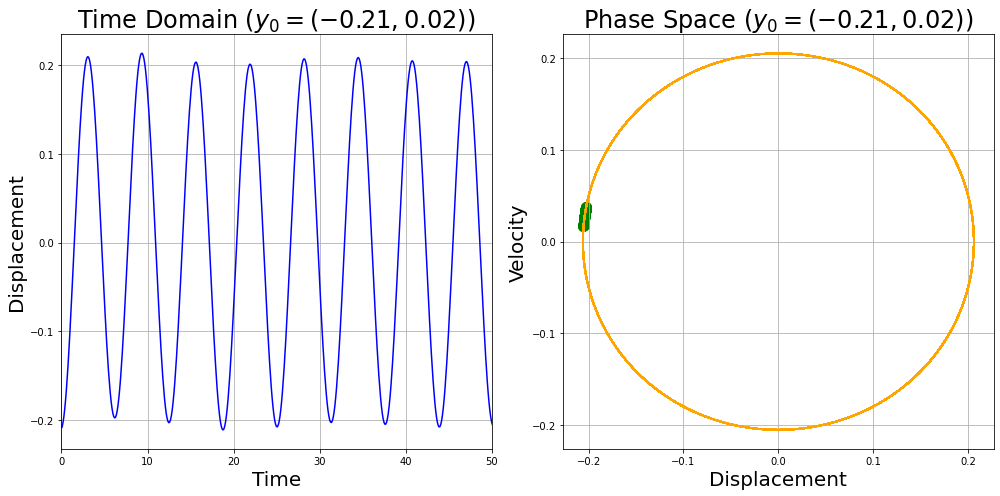

Plot saved as: center-col-plt2.eps


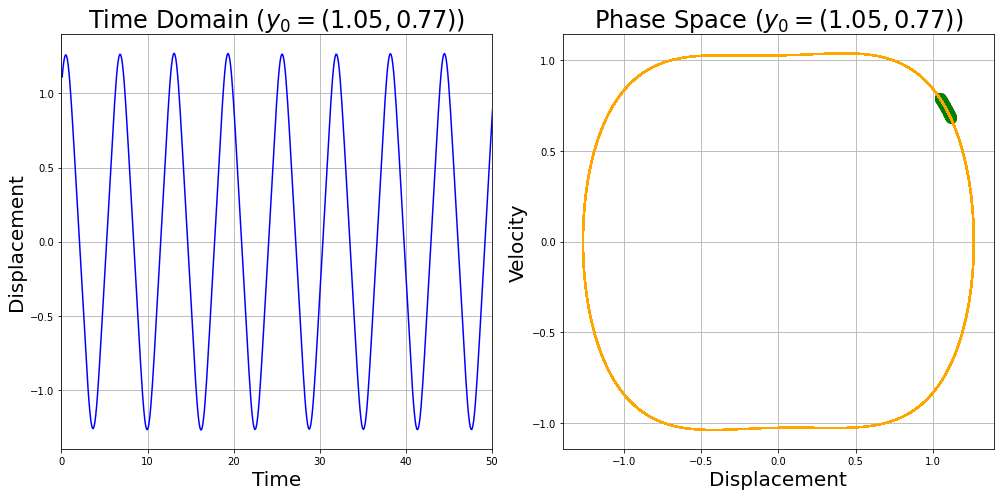

Plot saved as: center-col-plt3.eps


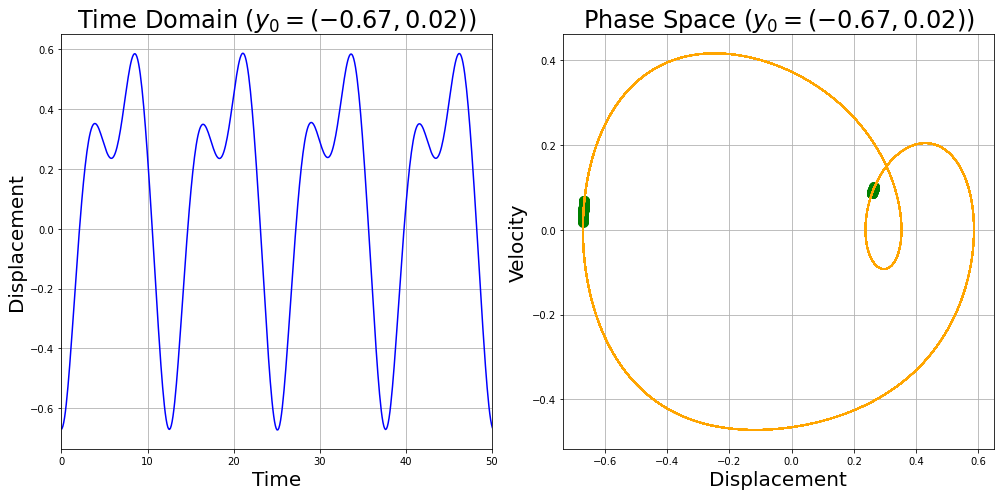

Plot saved as: center-col-plt4.eps


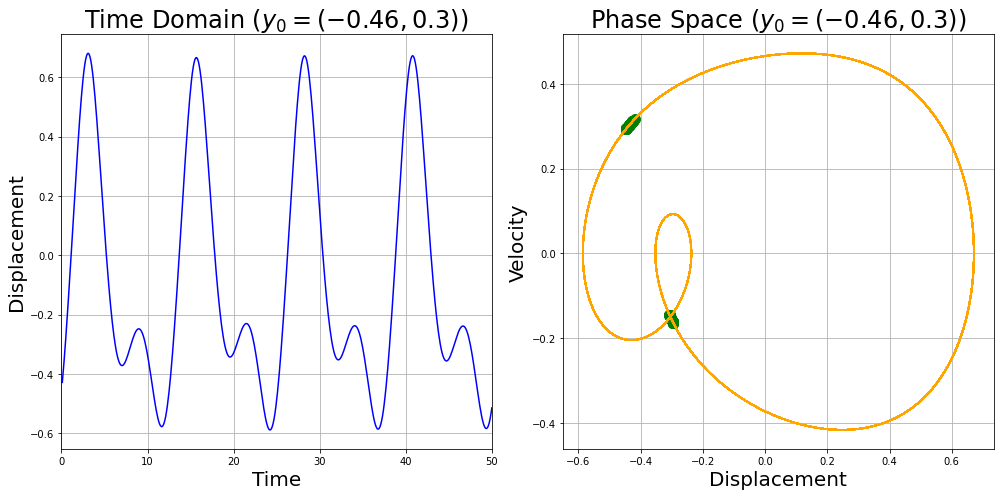

Plot saved as: center-col-plt5.eps


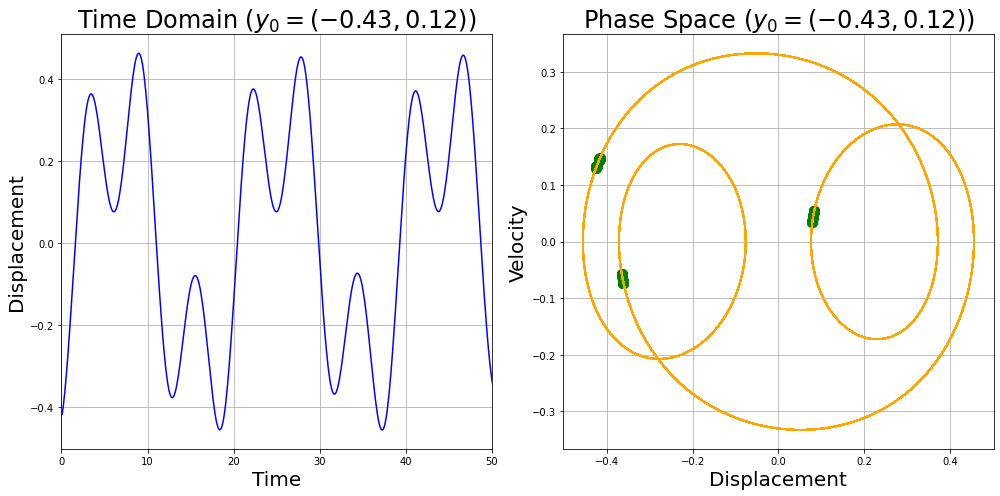

In [35]:
#this block creates plots for the middle column 
#commented out so i don't run and overwrite my files

params1 = {"y0": [-0.21, 0.02], "t_start": 0.0, "t_end": 2000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t1, x1_1, x2_1, px1_1, px2_1 = solve_ueda(**params1)
plot_ueda(t1, x1_1, x2_1, px1_1, px2_1, title_suffix="($y_0=(-0.21, 0.02$))", save_as="center-col-plt1.eps")

params2 = {"y0": [1.05, 0.77], "t_start": 0.0, "t_end": 2000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t2, x1_2, x2_2, px1_2, px2_2 = solve_ueda(**params2)
plot_ueda(t2, x1_2, x2_2, px1_2, px2_2, title_suffix="($y_0=(1.05, 0.77)$)", save_as="center-col-plt2.eps")

params3 = {"y0": [-0.67, 0.02], "t_start": 0.0, "t_end": 2000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t3, x1_3, x2_3, px1_3, px2_3 = solve_ueda(**params3)
plot_ueda(t3, x1_3, x2_3, px1_3, px2_3, title_suffix="($y_0=(-0.67, 0.02)$)", save_as="center-col-plt3.eps")

params4 = {"y0": [-0.46, 0.3], "t_start": 0.0, "t_end": 2000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t4, x1_4, x2_4, px1_4, px2_4 = solve_ueda(**params4)
plot_ueda(t4, x1_4, x2_4, px1_4, px2_4, title_suffix="($y_0=(-0.46, 0.3)$)", save_as="center-col-plt4.eps")

params5 = {"y0": [-0.43, 0.12], "t_start": 0.0, "t_end": 2000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t5, x1_5, x2_5, px1_5, px2_5 = solve_ueda(**params5)
plot_ueda(t5, x1_5, x2_5, px1_5, px2_5, title_suffix="($y_0=(-0.43, 0.12)$)", save_as="center-col-plt5.eps")


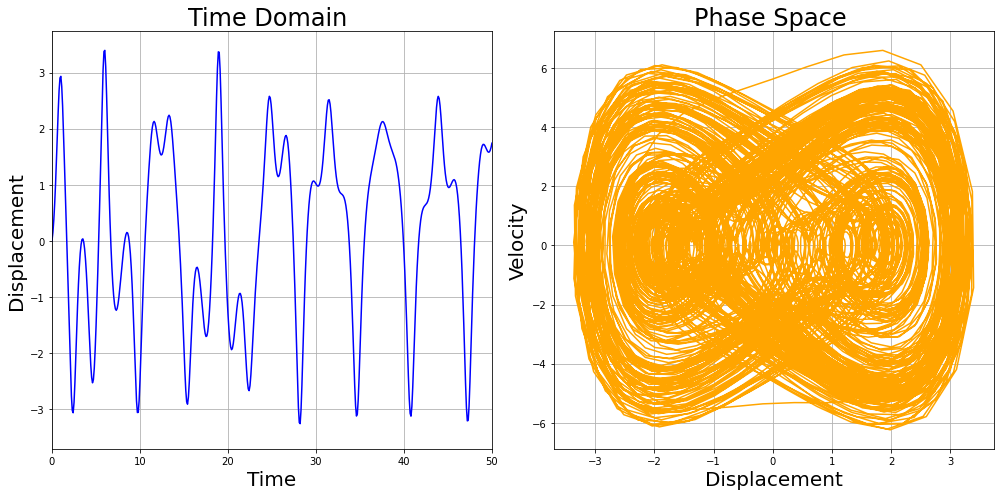

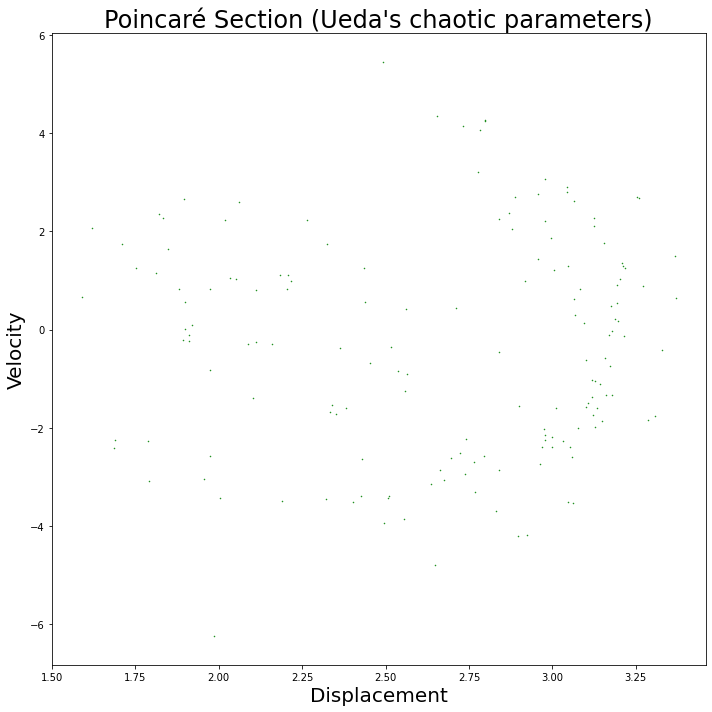

In [29]:
#this block creates plots for the chaotic parameter choices
'''
chaotic_params = {"y0": [0.0, 1], "t_start": 0.0, "t_end": 100000.0, "max_step":0.01}
t, x1, x2, p_x1, p_x2 = solve_ueda(**chaotic_params)
plot_ueda(t, x1, x2)
plot_poincare(p_x1, p_x2, title_suffix="(Ueda's chaotic parameters)")
'''

In [8]:
from scipy.signal import find_peaks
#this plots a bifurcation diagram for the oscillator as gamma varies. local extrema are plotted against gamme
def plot_bifurcation(gamma_values, y0=[0, 0], t_start=0, t_end=500, max_step=0.1, delta=0.05, title_suffix="", save_as=None):

    extrema_x = []  # List to hold local extrema of x
    extrema_gamma = []  # Corresponding gamma values

    for gamma in gamma_values:
        # Solve the system using the provided solve_ueda function
        t_values, x1_values, _, _, _ = solve_ueda(y0, t_start, t_end, max_step=max_step, delta=delta, gamma=gamma)

        # Find local extrema (peaks and troughs)
        peaks, _ = find_peaks(x1_values)
        troughs, _ = find_peaks(-1 * x1_values)
        extrema_indices = np.sort(np.concatenate((peaks, troughs)))
        local_extrema = np.array(x1_values)[extrema_indices]

        # Store results
        extrema_x.extend(local_extrema)
        extrema_gamma.extend([gamma] * len(local_extrema))

    # Create the bifurcation diagram
    plt.figure(figsize=(12, 12))
    scatter = plt.scatter(extrema_gamma, extrema_x, c=extrema_gamma, cmap='viridis', s=1, edgecolor='none')
    plt.colorbar(scatter)
    plt.xlabel("$\gamma$", fontsize=20)
    plt.ylabel("Local Extrema of $x$", fontsize=20)
    plt.title(f"Bifurcation Diagram {title_suffix}", fontsize=24)

    # Save or display the plot
    if save_as:
        plt.savefig(save_as, format='eps', dpi=1000)
        print(f"Bifurcation diagram saved as: {save_as}")
    else:
        plt.show()

Bifurcation diagram saved as: bifurcation.eps


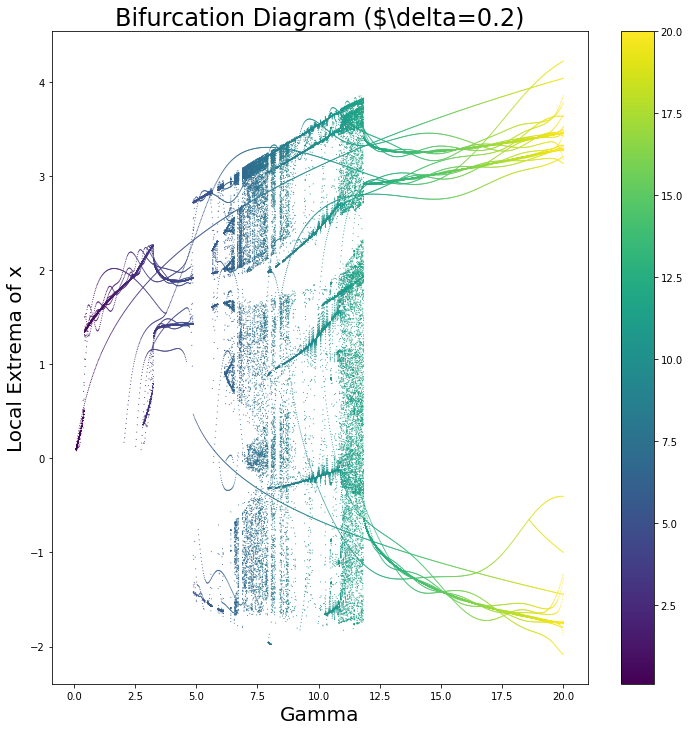

In [7]:

gamma_values = np.linspace(0.1, 20, 1000)

plot_bifurcation(gamma_values, y0=[0, 0], delta=0.2, max_step=0.01, title_suffix="($\delta=0.2$)", save_as="bifurcation.eps")


Below this cell is **the boneyard**. 
addendum: the inoperable functions were just deleted.

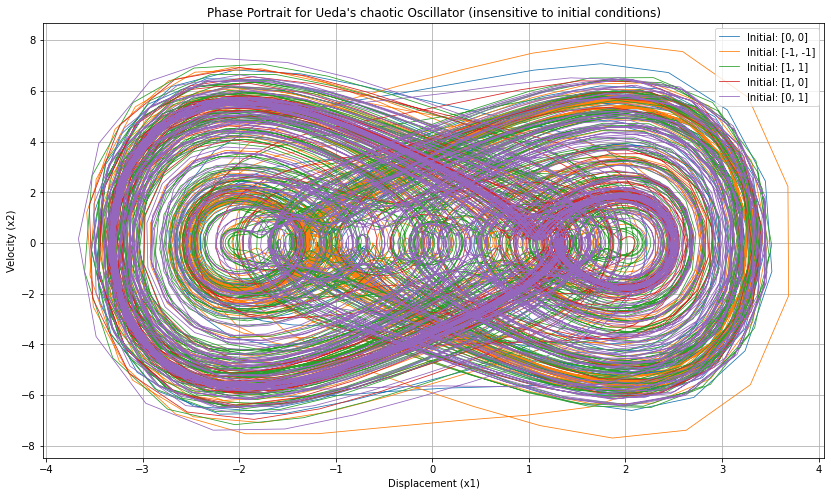

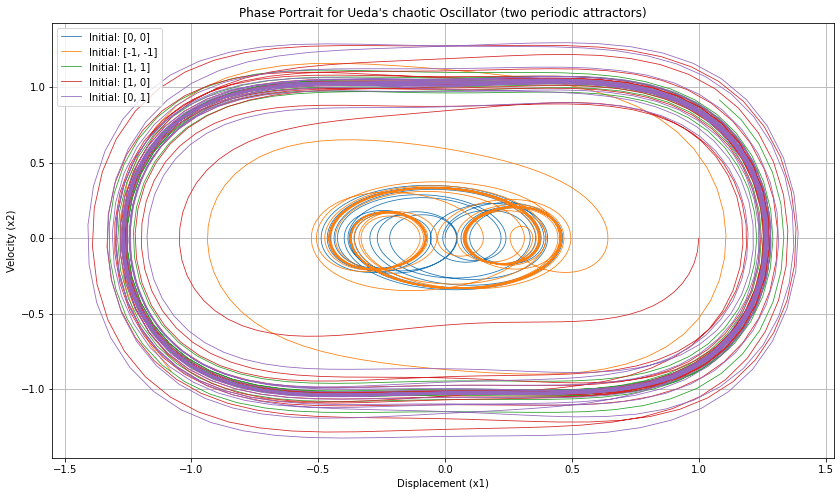

In [28]:
def plot_phase_portrait(delta, gamma, initial_conditions, t_start, t_end, max_step=0.1, title="Phase Portrait", figsize=(14, 8)):
    plt.figure(figsize=figsize)

    #solve Ueda's oscillator for each initial condition
    for y0 in initial_conditions:
        t_values, x1_values, x2_values, _, _ = solve_ueda(y0, t_start, t_end, max_step, delta, gamma)
        plt.plot(x1_values, x2_values, linewidth=0.8, label=f"Initial: {y0}")
    
    
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()
    

initial_conditions = [0, 0], [-1, -1], [1, 1], [1, 0], [0, 1]

#[[0.1 * i, 0.1 * j] for i in range(-5, 5) for j in range(-5, 5)]

plot_phase_portrait(0.05, 8.5, initial_conditions, 0, 500, title="Phase Portrait for Ueda's chaotic Oscillator (insensitive to initial conditions)")
plot_phase_portrait(0.08, 0.2, initial_conditions, 0, 500, title="Phase Portrait for Ueda's chaotic Oscillator (two periodic attractors)")